# Web Scraping

## 0. INTRODUCCIÓN

En este apartado se va a trabajar la extracción automática de datos de la web, proceso conocido como web scraping.

En la web, los servidores y los clientes generalmente se comunican a través de solicitudes HTTP.
El protocolo HTTP (‘Hyper Text Transfer Protocol’) especifica cómo se formatean y transmiten las solicitudes y respuestas.
Mediante este proceso solicitud-respuesta, es como se realiza la mayor parte de la navegación web. Al abrir una página, el navegador envía una solicitud al servidor de esa página, y el servidor responde con los recursos relevantes (texto, imágenes, tablas, etc. ).

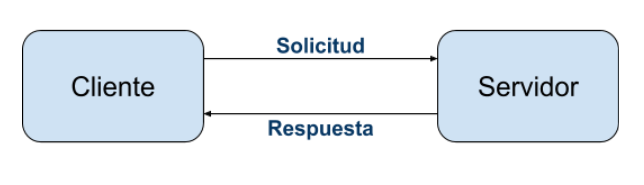






Principalmente, hay dos tipos de **solicitudes**:

1.   GET



- Permiten obtener datos del servidor.
- Se puede marcar como favorito.
- Los parámetros se agregan directamente a la URL.
- No se utiliza para enviar información confidencial (como contraseñas)


2.   POST

- Normalmente	se usa cuando un estado necesita ser alterado (como agregarle elementos carrito de compras) o al enviar contraseñas.
- Los parámetros se agregan en un cuerpo separado, así es más seguro
- No se puede marcar como favorito.



La **respuesta** contiene 2 piezas principales de información: el código de estado y el cuerpo de la respuesta.

- El __código de estado__ indica si la solicitud fue exitosa y / o la existencia de algún error. Está representado por un número de 3 dígitos.

  - Los códigos en estos rangos indican:

    - 2xx: Éxito.
    - 3xx: Redirección.
    - 4xx: Error del cliente.
    - 5xx: Error del servidor.

  - Los dos códigos más frecuentes son los siguientes:
    - 200 OK: La solicitud se cursó exitosamente.
    - 404 Not Found: El servidor no puede encontrar la página o fuente solicitada.

- El __cuerpo de la respuesta__ contiene la información de la solicitud. Normalmente, se obtiene en formato HTML o JSON.



---

Un **documento HTML** está formado por un conjunto de elementos o etiquetas anidadas, además de código JavaScript y CSS.

Antes de hacer scraping, por tanto, debemos conocer qué elementos o qué etiqueta contiene la información que queremos obtener de la página web en cuestión. Para ello, tenemos que tener presente las siguientes consideraciones:

- Un elemento o etiqueta tiene la siguiente sintaxis:

> **\<nombre_etiqueta\>**contenido **\<\/nombre_etiqueta\>**

> Estos elementos pueden tener información adicional especificada en los atributos de la etiqueta.


- Los atributos más comunes son:

  - id

  - class

> Ejemplo: \<div class=“descriptive-class-name”\>….\<\/div\>





- Las etiquetas más populares son:

  - link: \<a href=“url_of_link”\>Texto del link\<\/a\>
  - párrafo: \<p\>…\<\/p\>
  - elementos de cabecera: \<h1\>…\<\/h1\>, \<h2\>…\<\/h2\>, ...
  - etiqueta de un contenedor o conjunto de etiquetas: \<div class=“hahaha”\>…\<\/div\>
  - etiqueta para marcar parte del contenido: \<span id=“id de este span”\>…\<\/span\>








_Ejemplo esquema básico de un documento HTML_




```
<html>
	<head>
		<meta charset=”utf-8”/>
		<title> Ejemplo </title>
	</head>
	<body>
		<h1> Encabezado 1</h1>
		<p> Primer párrafo del ejemplo del html de ejemplo. </p>
		<h2> Encabezado 2.  </h2>
			<ul>
				<li>Element 1 de la lista</li>
				<li>Element 2 de la lista</li>
			</ul>
    <div>
      <p>Segundo párrafo. </p>
      <table>
        <th>Tabla de ejemplo </th>
        <tr>
          <td>celda 1,1 </td>
          <td>celda 1,2 </td>
          <td>celda 1,3 </td>
        </tr>
        <tr>
          <td>celda 2,1 </td>
          <td>celda 2,2 </td>
          <td>celda 2,3 </td>
        </tr>
      </table>
    </div>
	</body>
</html>

```




---

Las **principales metodologías** que nos permiten hacer web scraping son:

- Utilizando APIs (Application programming interface)
- Mediante Scrapers (librerías que nos permiten extraer datos web automáticamente. Por ejemplo, BeautifulSoap, Requests-html,...)
- Web crawling (un programa ‘spider’ busca por el contenido solicitado siguiendo links y explorándolos).

## 1. WEB SCRAPING CON APIs

Una **API** es una interfaz de programación de aplicaciones. Esta, especifica cómo deben interactuar cliente y un servidor. Si el cliente realiza una solicitud en un formato específico, el servidor siempre responderá en un formato documentado o iniciará una acción.

Algunas APIs son gratuitas, aunque la mayoría son de pago o requieren registro. En el último caso, normalmente se proporciona una clave (_KEY_) y una identificación (_IDENTIFICATION\_KEY_) que debe incorporarse en cada solicitud a esa API. Por último, algunas API de pago ofrecen también una versión gratuita disponible con fines educativos o académicos, prohíbiendo la comercialización de productos que hagan su uso sin previo pago de licencia.

Para realizar las consultas se requiere la previa **revisión de la documentación que proporciona la API** para conocer la sintaxis que requieren las consultas o solicitudes y cuáles son los códigos de estados relevantes de la misma.

En esta parte de la PEC vamos a trabajar con una API libre que no requiere registro, otra gratuita que si que lo requiere, y por último una API que es gratuita para uso académico y con previo registro.

### 1.1. APIs SIN REGISTRO



Para trabajar esta parte, vamos a realizar el scraping de datos relativos al mercado eléctrico español mediante una API que proporciona datos de generación, demanda, transporte, etc. de electricidad publicado por REE (Red Eléctrica de España).

La documentacion de la API está disponible en: https://www.ree.es/en/apidatos

En primer lugar, debemos cargar las librerías que vamos a utilizar y definir la URL común a todas las solicitudes (_requests_) que vamos a realizar (url_base) y especificar los paramétros de la petición que deseemos hacer:

In [ ]:
# Cargar packages
import requests # La librería requests proporciona las capacidades de mandar una petición/solicitud HTTP al servidor
import json

In [ ]:
# Definir la URL común a todas las requests de la web que vamos a scrapear
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl = 'generacion/estructura-generacion?start_date=2023-07-01T00:00&end_date=2023-07-31T00:00&time_trunc=month'

In [ ]:
# Realizar una solicitud (request) al endpoint de la API con el método requests.get
headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Host": "apidatos.ree.es",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

respuesta = requests.get(url_base+url_compl, headers=headers)

Revisaremos el estado de la solicitud mediante el atributo _.status\_code_ de la respuesta.

In [ ]:
# Comprobar el estado de la solicitud
respuesta.status_code

200

Como vemos, la solicitud se ha cursado correctamente. También se podría verificar con el atributo _.ok_

In [ ]:
# Checking if the request went through ok
respuesta.ok

True

En este caso, la respuesta se puede obtener en formato json. Por tanto, para visualizar la respuesta en tal formato, aplicamos el método _.json()_. Además, con el uso de la librería json se puede hacer más leíble la respuesta.

In [ ]:
print ('\n\nLas claves del diccionario son:\n'+str( respuesta.json().keys()) )

print(json.dumps(respuesta.json(),indent=4))



Las claves del diccionario son:
dict_keys(['data', 'included'])
{
    "data": {
        "type": "Generaci\u00f3n por tecnolog\u00eda",
        "id": "gen1",
        "attributes": {
            "title": "Generaci\u00f3n por tecnolog\u00eda",
            "last-update": "2025-01-28T16:15:51.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2025-04-19T05:42:51"
            }
        }
    },
    "included": [
        {
            "type": "Hidr\u00e1ulica",
            "id": "10288",
            "groupId": "1",
            "attributes": {
                "title": "Hidr\u00e1ulica",
                "description": null,
                "color": "#0090d1",
                "icon": null,
                "type": "Renovable",
                "magnitude": null,
                "composite": false,
                "last-update": "2025-01-28T16:15:46.000+01:00",
                "values

A partir de la URL base, modificando los parámetros de la url, se pueden obtener detalles como el balance eléctrico, la demanda (en términos de sectores económicos, la evolución, etc.), la generacón (con su estructura, la cantidad renovable, la potencia instalada, el balance en términos de CO2, etc.), los intercambios con los países colindantes, el transporte (líneas, cortes, interrupciones, etc.) y datos referentes al mercado como pueden ser los precios, costes, etc. Todos estos datos se pueden obtener por CCAA o en global así como especificando el rango temporal y con distinta frecuencia.

La sintaxis de los diferentes parametros de la url quedan explicados en la documentación de la API, de forma que podamos modificarlos de acuerdo con lo que se desee obtener.

_Por ejemplo, para conocer la demanda eléctrica mensual (time_trunc = month) a lo largo del 2019 para Navarra y las Baleares, la solicitud quedaría como sigue:_

In [ ]:
# Definir url base y los parametros de la url correspondientes a la información que se desee obtener.
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl1 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=8743'
url_compl2 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=14'

# Obtener la respuesta a la solicitud HTML
respuesta1 = requests.get(url_base+url_compl1, headers=headers)
respuesta2 = requests.get(url_base+url_compl2, headers=headers)

In [ ]:
#Comprobar el estado de la solicitud
print('Estado de la respuesta Baleares:', respuesta1.status_code)
print('Estado de la respuesta Navarra:', respuesta2.status_code)

#Imprimir resultados: Se puede ver la estacionalidad en Baleares (turismo)
print(json.dumps(respuesta1.json(), indent=4))
print(json.dumps(respuesta2.json(), indent=4))

Estado de la respuesta Baleares: 200
Estado de la respuesta Navarra: 200
{
    "data": {
        "type": "Evoluci\u00f3n de la demanda",
        "id": "dem1",
        "attributes": {
            "title": "Evoluci\u00f3n de la demanda",
            "last-update": "2020-01-10T08:15:41.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2025-04-19T05:43:11"
            }
        }
    },
    "included": [
        {
            "type": "Demanda",
            "id": "10297",
            "groupId": null,
            "attributes": {
                "title": "Demanda",
                "description": null,
                "color": "#ffea00",
                "icon": null,
                "type": null,
                "magnitude": null,
                "composite": false,
                "last-update": "2020-01-10T08:15:41.000+01:00",
                "values": [
                    {
  

#### **Práctico 1** (Emisiones, Renovables y Precios)

Una vez revisada la documentación de la API (https://www.ree.es/en/apidatos), se va a implementar un código python válido que permita dar respuesta a las siguientes preguntas:

1. Cuantás fueron las emisiones de CO2 (widget no-renovables-detalle-emisiones-CO2) debido al uso de motores diésel a nivel nacional durante el año 2024 y que porcentaje supusieron con respecto al resto de no renovables.

2. Para el año de 2023, devolver el porcentaje de generación por tecnología renovable de las fuentes hidráulica y solar fotovoltaica (widget estructura-renovables) para Galicia y las Islas Canarias.

3. Obtener la evolución mensual del porcentaje de potencia instalada (widget potencia-instalada) hidráulica y solar fotovoltaica para Galicia y Castilla y León de 2019 a 2024 (ambos incluidos). ¿Qué limitación de la API nos aparece? Mostrar el error.

4. Con más de un _GET_, obtener la evolución mensual del porcentaje de potencia instalada hidráulica y solar fotovoltaica para Galicia y Castilla y León de 2019 a 2024 (ambos incluidos). Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal. Comentar el resultado.

5. Obtener los precios horarios (widget _precios-mercados-tiempo-real_) de la semana del 23 al 29 de diciembre de 2024. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal y obtener el día y hora para para el cual se produjo el precio máximo.

6. Obtener los precios horarios (widget _precios-mercados-tiempo-real_) del 1 al 31 de enero de 2025. Agrupar y calcular el precio medio diario. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal.

7. Finalmente, obtener el mix de generación (widget _estructura-generacion_) del 1 al 31 de enero de 2025. Pasar de tanto por uno a tanto por ciento y añadir el precio obtenido en el anterior apartado. Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal del mix con el precio medio. Se deben representar al menos las energias más relevantes. Comentar el resultado.

Cargar librerías

In [ ]:
# Cargar packages
import requests # La librería requests proporciona las capacidades de mandar una petición/solicitud HTTP al servidor
import json

1a pregunta

In [ ]:
# Definir url base y los parametros de la url correspondientes a la información que se desee obtener.
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl1a = 'generacion/no-renovables-detalle-emisiones-CO2?start_date=2024-01-01T00:00&end_date=2024-12-31T23:59&time_trunc=year&systemElectric=nacional'

# Obtener la respuesta a la solicitud HTML
respuesta1 = requests.get(url_base+url_compl1a, headers=headers)

In [ ]:
#Comprobar el estado de la solicitud
print('Estado de la respuesta:', respuesta1.status_code)

Estado de la respuesta: 200


In [ ]:
# Comprobar el estado de la respuesta antes de procesarla
if respuesta1.status_code == 200:
    # Convertir el contenido de la respuesta a formato JSON
    datos_json = respuesta1.json()

    # Iterar sobre los datos incluidos
    for indicador in datos_json["included"]:
        if indicador["attributes"]["title"] == "Motores diésel":
            emisiones_diesel = indicador["attributes"]["values"][0]["value"]
            porcentaje_diesel = indicador["attributes"]["values"][0]["percentage"]
    print(f"Emisiones de CO2 debidas al uso de motores diésel en 2024: {emisiones_diesel:.2f} tCO2 eq.")
    print(f"Porcentaje que representan respecto al total de no renovables: {porcentaje_diesel * 100:.2f}%.")
else:
    # Manejar casos de error
    print(f"Error en la solicitud: Código de estado {respuesta1.status_code}")

Emisiones de CO2 debidas al uso de motores diésel en 2024: 1721089.93 tCO2 eq.
Porcentaje que representan respecto al total de no renovables: 6.37%.


2a pregunta

In [ ]:
# Definir parametros de la url correspondientes a la información que se desee obtener para Galicia y las Islas Canarias
url_compl2a_Galica = 'generacion/estructura-renovables?start_date=2023-01-01T00:00&end_date=2023-12-31T23:59&time_trunc=year&geo_ids=17&geo_trunc=electric_system&geo_limit=ccaa'
url_compl2a_Canarias = 'generacion/estructura-renovables?start_date=2023-01-01T00:00&end_date=2023-12-31T23:59&time_trunc=year&geo_ids=8742&geo_trunc=electric_system&geo_limit=ccaa'

# Obtener la respuesta a la solicitud HTML
respuesta2_Galicia = requests.get(url_base+url_compl2a_Galica, headers=headers)
respuesta2_Canarias = requests.get(url_base+url_compl2a_Canarias, headers=headers)

In [ ]:
# Función para extraer datos de una respuesta JSON
def extraer_porcentajes(respuesta, region):
    if respuesta.status_code == 200:
        datos_json = respuesta.json()
        fuente_Hidraulica = None
        fuente_SolarFotovoltaica = None

        # Iterar sobre los datos incluidos en la respuesta
        for indicador in datos_json.get("included", []):
            if indicador["attributes"]["title"] == "Hidráulica":
                fuente_Hidraulica = indicador["attributes"]["values"][0]["percentage"] * 100
            elif indicador["attributes"]["title"] == "Solar fotovoltaica":
                fuente_SolarFotovoltaica = indicador["attributes"]["values"][0]["percentage"] * 100

        # Mostrar los resultados
        print(f"· Datos de {region}:")
        print(f"")
        if fuente_Hidraulica is not None:
            print(f"   - Porcentaje de generación hidráulica: {fuente_Hidraulica:.2f}%")
        else:
            print(f"   - No se encontraron datos de generación hidráulica en {region}.")

        if fuente_SolarFotovoltaica is not None:
            print(f"   - Porcentaje de generación solar fotovoltaica: {fuente_SolarFotovoltaica:.2f}%")
        else:
            print(f"   - No se encontraron datos de generación solar fotovoltaica en {region}.")
        print("\n")
    else:
        print(f"Error en la solicitud para {region}: Código de estado {respuesta.status_code}")

# Extraer y mostrar datos para Galicia y Canarias
extraer_porcentajes(respuesta2_Galicia, "Galicia")
extraer_porcentajes(respuesta2_Canarias, "Canarias")

· Datos de Galicia:

   - Porcentaje de generación hidráulica: 46.65%
   - Porcentaje de generación solar fotovoltaica: 0.12%


· Datos de Canarias:

   - Porcentaje de generación hidráulica: 0.20%
   - Porcentaje de generación solar fotovoltaica: 20.36%




3a pregunta --> print el error

In [ ]:
# Definir parametros de la url correspondientes a la información que se desee obtener para Galicia y Castilla Leon
url_compl3a_Galica = 'generacion/potencia-instalada?start_date=2019-01-01T00:00&end_date=2024-12-31T23:59&time_trunc=monthj&geo_ids=17&geo_trunc=electric_system&geo_limit=ccaa'
url_compl3a_CastillaLeon = 'generacion/potencia-instalada?start_date=2019-01-01T00:00&end_date=2024-12-31T23:59&time_trunc=month&geo_ids=8&geo_trunc=electric_system&geo_limit=ccaa'

# Obtener la respuesta a la solicitud HTML
respuesta3_Galicia = requests.get(url_base+url_compl3a_Galica, headers=headers)
respuesta2_CastillaLeon = requests.get(url_base+url_compl3a_CastillaLeon, headers=headers)

In [ ]:
#Comprobar el estado de la solicitud
print('Estado de la respuesta Baleares:', respuesta3_Galicia.status_code)
print('Estado de la respuesta Navarra:', respuesta2_CastillaLeon.status_code)

Estado de la respuesta Baleares: 500
Estado de la respuesta Navarra: 500


El error que obtenemos es el 500 Internal Server Error.
Realizando la consulta en la misma web de la API obtenemos el siguiente error:
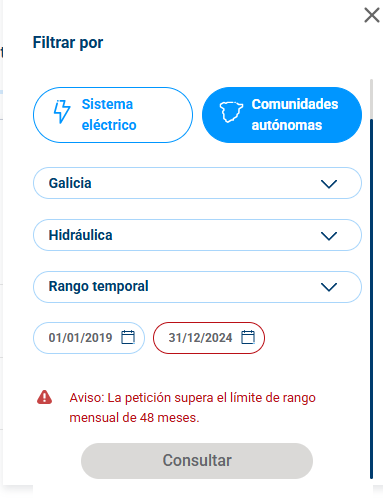

4a pregunta

Galicia - Hidráulica
                        datetime  percentage
0  2019-01-01T00:00:00.000+01:00   34.019420
1  2019-02-01T00:00:00.000+01:00   34.014767
2  2019-03-01T00:00:00.000+01:00   34.016798
3  2019-04-01T00:00:00.000+02:00   34.016798
4  2019-05-01T00:00:00.000+02:00   33.983451

Galicia - Solar Fotovoltaica
                        datetime  percentage
0  2019-01-01T00:00:00.000+01:00    0.150586
1  2019-02-01T00:00:00.000+01:00    0.164244
2  2019-03-01T00:00:00.000+01:00    0.164254
3  2019-04-01T00:00:00.000+02:00    0.164254
4  2019-05-01T00:00:00.000+02:00    0.164093

Castilla y León - Hidráulica
                        datetime  percentage
0  2019-01-01T00:00:00.000+01:00   32.385850
1  2019-02-01T00:00:00.000+01:00   32.283640
2  2019-03-01T00:00:00.000+01:00   33.126142
3  2019-04-01T00:00:00.000+02:00   33.126142
4  2019-05-01T00:00:00.000+02:00   33.126052

Castilla y León - Solar Fotovoltaica
                        datetime  percentage
0  2019-01-01T00:00:00.000

<ipython-input-16-cbbd5ff96676>:62: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(df_galicia_hidraulica["datetime"]), df_galicia_hidraulica["percentage"], label="Galicia - Hidráulica")
<ipython-input-16-cbbd5ff96676>:63: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(df_galicia_solar["datetime"]), df_galicia_solar["percentage"], label="Galicia - Solar Fotovoltaica")
<ipython-input-16-cbbd5ff96676>:

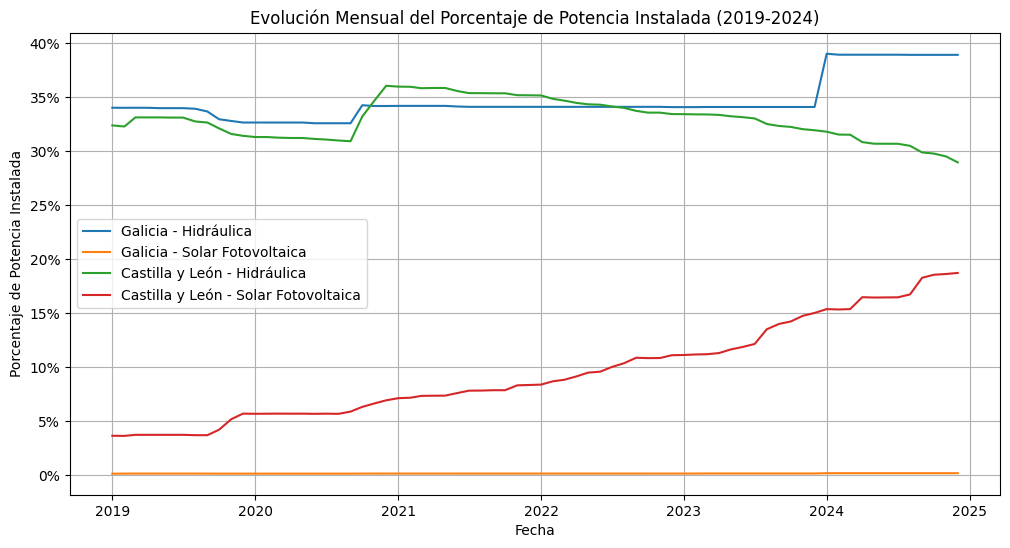

In [ ]:
# Importar librerías necesarias
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Definir la URL base de la API
url_base = 'https://apidatos.ree.es/es/datos/'

# Dividir las fechas en dos rangos para evitar el límite de 48 meses
urls4a = {
    "Galicia_2019_2022": 'generacion/potencia-instalada?start_date=2019-01-01T00:00&end_date=2022-01-31T23:59&time_trunc=month_48&geo_ids=17&geo_trunc=electric_system&geo_limit=ccaa',
    "Galicia_2022_2024": 'generacion/potencia-instalada?start_date=2022-02-01T00:00&end_date=2024-12-31T23:59&time_trunc=month_48&geo_ids=17&geo_trunc=electric_system&geo_limit=ccaa',
    "CastillaLeon_2019_2022": 'generacion/potencia-instalada?start_date=2019-01-01T00:00&end_date=2022-01-31T23:59&time_trunc=month_48&geo_ids=8&geo_trunc=electric_system&geo_limit=ccaa',
    "CastillaLeon_2022_2024": 'generacion/potencia-instalada?start_date=2022-02-01T00:00&end_date=2024-12-31T23:59&time_trunc=month_48&geo_ids=8&geo_trunc=electric_system&geo_limit=ccaa',
}

# Realizar las solicitudes y almacenar los datos
data = {}
for key, url in urls4a.items():
    response = requests.get(url_base + url, headers= headers)
    if response.status_code == 200:
        data[key] = response.json()
    else:
        print(f"Error en la solicitud para {key}: {response.status_code}")

# Función para extraer datos de una tecnología específica
def extract_data(json_data, technology):
    records = []
    for item in json_data["included"]:
        if item["attributes"]["title"] == technology:
            for value in item["attributes"]["values"]:
                records.append({
                    "datetime": value["datetime"],
                    "percentage": value["percentage"] * 100 # convertimos a porcentaje
                })
    return pd.DataFrame(records)

# Crear DataFrames combinando los datos por región y tecnología
def process_region(data, region_key, technology):
    df_2019_2022 = extract_data(data[f"{region_key}_2019_2022"], technology)
    df_2022_2024 = extract_data(data[f"{region_key}_2022_2024"], technology)
    return pd.concat([df_2019_2022, df_2022_2024])

# Procesar los datos para Galicia y Castilla y León
df_galicia_hidraulica = process_region(data, "Galicia", "Hidráulica")
df_galicia_solar = process_region(data, "Galicia", "Solar fotovoltaica")
df_castillaleon_hidraulica = process_region(data, "CastillaLeon", "Hidráulica")
df_castillaleon_solar = process_region(data, "CastillaLeon", "Solar fotovoltaica")

# Mostrar los DataFrames
print("Galicia - Hidráulica")
print(df_galicia_hidraulica.head())
print("\nGalicia - Solar Fotovoltaica")
print(df_galicia_solar.head())
print("\nCastilla y León - Hidráulica")
print(df_castillaleon_hidraulica.head())
print("\nCastilla y León - Solar Fotovoltaica")
print(df_castillaleon_solar.head())

# Graficar la evolución temporal
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df_galicia_hidraulica["datetime"]), df_galicia_hidraulica["percentage"], label="Galicia - Hidráulica")
plt.plot(pd.to_datetime(df_galicia_solar["datetime"]), df_galicia_solar["percentage"], label="Galicia - Solar Fotovoltaica")
plt.plot(pd.to_datetime(df_castillaleon_hidraulica["datetime"]), df_castillaleon_hidraulica["percentage"], label="Castilla y León - Hidráulica")
plt.plot(pd.to_datetime(df_castillaleon_solar["datetime"]), df_castillaleon_solar["percentage"], label="Castilla y León - Solar Fotovoltaica")
# Formatear el eje Y como porcentaje
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
plt.xlabel("Fecha")
plt.ylabel("Porcentaje de Potencia Instalada")
plt.title("Evolución Mensual del Porcentaje de Potencia Instalada (2019-2024)")
plt.legend()
plt.grid()
plt.show()




5a pregunta

                           precio
datetime                         
2024-12-23 00:00:00+01:00   69.17
2024-12-23 01:00:00+01:00   61.28
2024-12-23 02:00:00+01:00   62.95
2024-12-23 03:00:00+01:00   64.38
2024-12-23 04:00:00+01:00   63.09
...                           ...
2024-12-29 19:00:00+01:00  199.80
2024-12-29 20:00:00+01:00  204.54
2024-12-29 21:00:00+01:00  205.34
2024-12-29 22:00:00+01:00  193.21
2024-12-29 23:00:00+01:00  190.33

[168 rows x 1 columns]


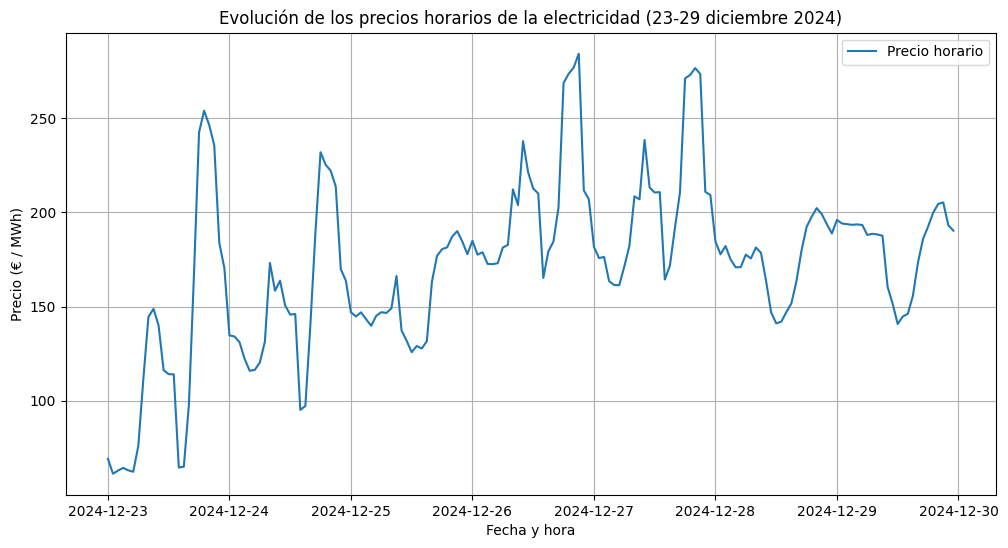

El precio máximo fue de 284.29 € / MWh y se produjo el 2024-12-26 21:00:00+01:00.


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Definir la URL base de la API y los parámetros de la solicitud
url_base5a = 'https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real'
params = {
    'start_date': '2024-12-23T00:00',
    'end_date': '2024-12-29T23:59',
    'time_trunc': 'hour'
}

# Realizar la solicitud GET a la API
response = requests.get(url_base5a, params=params, headers= headers)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    datos = response.json()

    # Extraer los datos de precios horarios
    precios = []
    for item in datos['included']:
        if item['type'] == 'PVPC':
            for value in item['attributes']['values']:
                precios.append({
                    'datetime': value['datetime'],
                    'precio': value['value']
                })

    # Crear un DataFrame con los datos
    df_precios = pd.DataFrame(precios)
    df_precios['datetime'] = pd.to_datetime(df_precios['datetime'])
    df_precios.set_index('datetime', inplace=True)

    # Mostrar el DataFrame
    print(df_precios)

    # Graficar la evolución temporal de los precios
    plt.figure(figsize=(12, 6))
    plt.plot(df_precios.index, df_precios['precio'], label='Precio horario')
    plt.xlabel('Fecha y hora')
    plt.ylabel('Precio (€ / MWh)')
    plt.title('Evolución de los precios horarios de la electricidad (23-29 diciembre 2024)')
    plt.legend()
    plt.grid()
    plt.show()


    # Obtener el día y hora del precio máximo
    precio_maximo = df_precios['precio'].max()
    momento_maximo = df_precios['precio'].idxmax()
    print(f'El precio máximo fue de {precio_maximo} € / MWh y se produjo el {momento_maximo}.')
else:
    print(f'Error en la solicitud: {response.status_code}')


6a pregunta

Precio medio diario de enero 2025:
                               precio
datetime                             
2025-01-01 00:00:00+01:00  161.877917
2025-01-02 00:00:00+01:00  199.784583
2025-01-03 00:00:00+01:00  191.542500
2025-01-04 00:00:00+01:00  145.766250
2025-01-05 00:00:00+01:00  106.036667
2025-01-06 00:00:00+01:00  101.048750
2025-01-07 00:00:00+01:00  163.265833
2025-01-08 00:00:00+01:00  170.449583
2025-01-09 00:00:00+01:00  159.646250
2025-01-10 00:00:00+01:00  179.370417


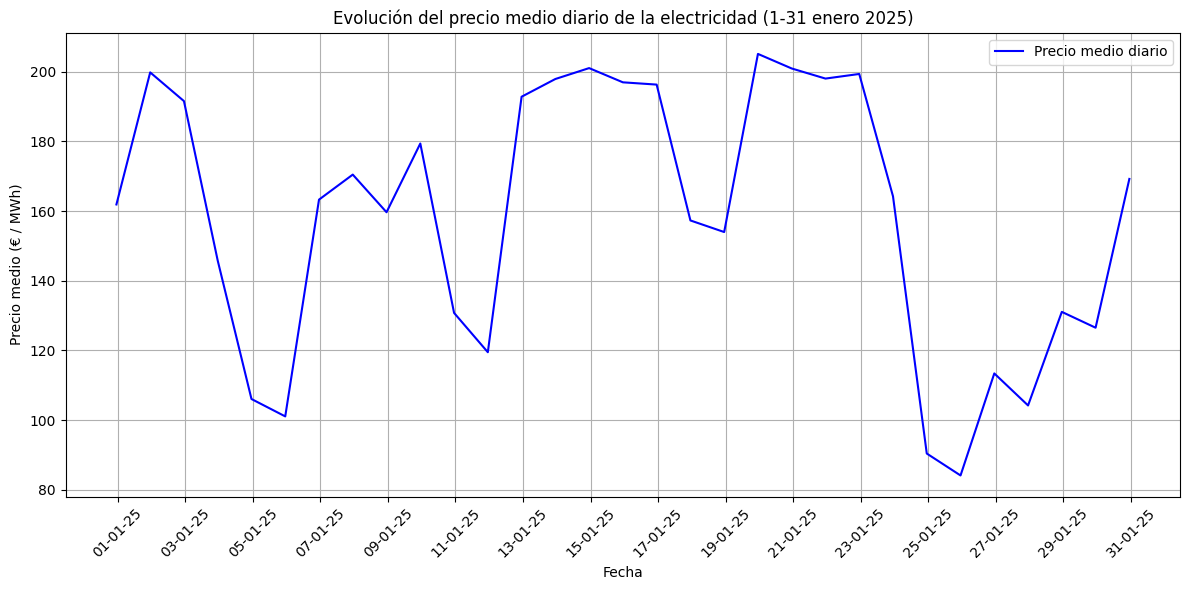

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Definir la URL base de la API y los parámetros de la solicitud
url_base6a = 'https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real'
params = {
    'start_date': '2025-01-01T00:00',
    'end_date': '2025-01-31T23:59',
    'time_trunc': 'hour'
}

# Realizar la solicitud GET a la API
response = requests.get(url_base6a, params=params, headers=headers)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    datos = response.json()

    # Extraer los datos de precios horarios
    precios = []
    for item in datos['included']:
        if item['type'] == 'PVPC':
            for value in item['attributes']['values']:
                precios.append({
                    'datetime': value['datetime'],
                    'precio': value['value']
                })

    # Crear un DataFrame con los datos
    df_precios = pd.DataFrame(precios)
    df_precios['datetime'] = pd.to_datetime(df_precios['datetime'])

    # Establecer la columna datetime como índice
    df_precios.set_index('datetime', inplace=True)

    # Calcular el precio medio diario
    df_precios_diario = df_precios.resample('D').mean()

    # Mostrar las primeras filas del DataFrame con el precio medio diario
    print("Precio medio diario de enero 2025:")
    print(df_precios_diario.head(10))  # Mostrar las primeras 10 filas

    # Graficar la evolución temporal de los precios medios diarios
    plt.figure(figsize=(12, 6))
    plt.plot(df_precios_diario.index, df_precios_diario['precio'], label='Precio medio diario', color='b', linewidth=1.5)

    # Etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Precio medio (€ / MWh)')
    plt.title('Evolución del precio medio diario de la electricidad (1-31 enero 2025)')
    plt.legend()
    plt.grid()

    # Formatear el eje X para mostrar las fechas de manera más legible
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Etiquetas cada 2 días
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad

    # Ajustar el diseño para que no se corte el texto
    plt.tight_layout()
    plt.show()

else:
    print(f'Error en la solicitud: {response.status_code}')


7a pregunta

DataFrame combinado:
                             Carbón  Ciclo combinado  Cogeneración     Eólica  \
datetime                                                                        
2025-01-01 00:00:00+01:00  1.107913        22.105026      6.044222  15.644382   
2025-01-02 00:00:00+01:00  1.411078        19.392765      6.665089  22.091473   
2025-01-03 00:00:00+01:00  1.032229        10.668312      6.580324  37.685311   
2025-01-04 00:00:00+01:00  0.905285        11.148780      6.693979  33.634906   
2025-01-05 00:00:00+01:00  0.917959         8.432221      4.697014  46.312697   

                           Generación total  Hidroeólica  Hidráulica  \
datetime                                                               
2025-01-01 00:00:00+01:00             100.0     0.002074    9.482957   
2025-01-02 00:00:00+01:00             100.0     0.002790   10.028636   
2025-01-03 00:00:00+01:00             100.0     0.004403    8.935618   
2025-01-04 00:00:00+01:00             100.0     0.0

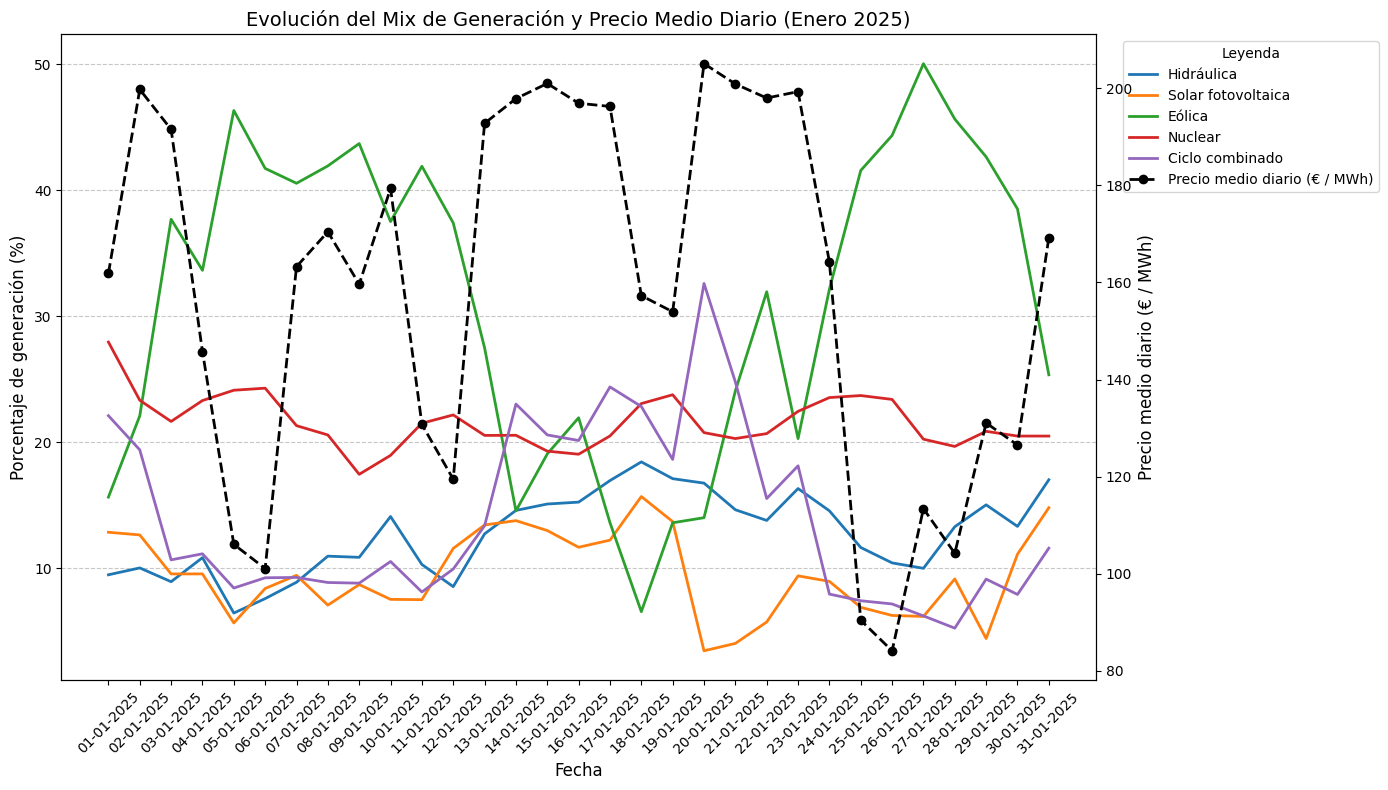

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que ya tenemos el DataFrame df_precios_diario generado previamente
# Generación de un nuevo request para el mix de generación (estructura-generacion)
url_mix7a = 'https://apidatos.ree.es/es/datos/generacion/estructura-generacion'
params_mix = {
    'start_date': '2025-01-01T00:00',
    'end_date': '2025-01-31T23:59',
    'time_trunc': 'day'
}

# Realizar el GET para el mix de generación
response_mix = requests.get(url_mix7a, params=params_mix, headers=headers)
if response_mix.status_code == 200:
    datos_mix = response_mix.json()

    # Extraer los datos del mix de generación
    generacion = []
    for item in datos_mix['included']:
        for value in item['attributes']['values']:
            generacion.append({
                'datetime': value['datetime'],
                'tecnologia': item['attributes']['title'],
                'porcentaje': value['percentage'] * 100  # Convertir a porcentaje
            })

    # Crear el DataFrame del mix de generación
    df_generacion = pd.DataFrame(generacion)
    df_generacion['datetime'] = pd.to_datetime(df_generacion['datetime'])
    df_generacion = df_generacion.pivot(index='datetime', columns='tecnologia', values='porcentaje')  # Reorganizar por tecnología
else:
    print(f"Error en la solicitud del mix de generación: {response_mix.status_code}")

# Combinar el DataFrame del mix de generación con el precio medio diario
df_combined = df_generacion.merge(df_precios_diario.rename(columns={'precio': 'precio_medio'}),
                                  left_index=True, right_index=True, how='left')

# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined.head())

# Seleccionar las energías más relevantes para el gráfico
relevant_technologies = ['Hidráulica', 'Solar fotovoltaica', 'Eólica', 'Nuclear', 'Ciclo combinado']


# Crear una figura y un eje
fig, ax1 = plt.subplots(figsize=(14, 8))

for tech in relevant_technologies:
    ax1.plot(df_combined.index, df_combined[tech], label=tech, linewidth=2)

# Etiquetas y personalización del eje Y (Porcentaje de generación)
ax1.set_ylabel('Porcentaje de generación (%)', fontsize=12)
ax1.set_xlabel('Fecha', fontsize=12)

# Configuración del eje X con las fechas
ax1.set_xticks(df_combined.index)  # Usar las fechas como índices directamente
ax1.set_xticklabels(df_combined.index.strftime('%d-%m-%Y'), rotation=45, fontsize=10)  # Formatear las fechas como etiquetas

# Añadir cuadrícula para claridad
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el precio medio
ax2 = ax1.twinx()  # Compartir el eje X
ax2.plot(df_combined.index, df_combined['precio_medio'], color='black', linestyle='--', marker='o',
         label='Precio medio diario (€ / MWh)', linewidth=2)
ax2.set_ylabel('Precio medio diario (€ / MWh)', fontsize=12)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, title="Leyenda", loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)

# Personalizar el título y ajustar diseño
plt.title('Evolución del Mix de Generación y Precio Medio Diario (Enero 2025)', fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En el grafico obtenido podemos observar la evolución del mix de generación de energías renovables y no renovables, combinado con el precio medio diario durante el mes de enero de 2025.

Si nos fijamos en las tecnologías más dinamicas como la eólica y solar fotovoltaica, observamos fluctuaciones significativas a lo largo del mes, reflejando su dependencia de factores cliáticos.

Por otro lado, la nuclear destaca por su estabilidad, ya que es una fuente constante de energía en el mix que tenemos. La generación hidráulica y el ciclo combinado presentan variaciones importantes, lo que podemos relacionar con la demanda électrica y condiciones metorológicas particulares.

En cuanto a la realcion con el precio medio, parecen correlacionarse con la variabilidad de fuentes renovables, lo que podría indicar una dependencia del mercado en tecnologías menos previsibles. Podemos ver que los precios varián entre los 80€/MWh y más de 200€/MWh, lo que puede estar reflejando los impactos del equilibrio entre ogerta y demanda.


### 1.2. APIs QUE NECESITAN REGISTRO

Para trabajar esta parte vamos a empezar trabajando un ejemplo con una de las APIs que ofrece la NASA para obtener patentes relativas a diferentes campos de la ciencia.

Para utilizar esta API, a diferencia del caso anterior, hace falta registrarse para obtener una clave (_API_KEY_) que va a necesitar ser incluida para realizar las diferentes solicitudes a la API.


Una vez obtenida la clave y revisada la documentación de la API, podemos empezar a realizar peticiones para obtener datos.

En el siguiente ejemplo, vamos a obtener las patentes relacionadas en la medicina que hay registradas.


In [ ]:
url_base='https://api.nasa.gov/techtransfer/'
API_KEY="XXXXXXXXXXXX"

# Opción 1
r1 = requests.get(url_base+"patent/", params = {"patent": "medicine","api_key":API_KEY})

#Opción 2
r2 = requests.get('https://api.nasa.gov/techtransfer/patent/?engine&patent=medicine&api_key='+API_KEY)


r1 y r2 ofrecen la misma respuesta.

In [ ]:
# Imprimir los resultados obtenidos
print(json.dumps(r1.json(), indent=4))

{
    "results": [
        [
            "59fa144f9600025c4c39485a",
            "LAR-TOPS-248",
            "Non-invasive Intracranial Pressure Measurement",
            "An acknowledged objective of critical care medicine is a timely, accurate, readily deployable, cost-effective and, importantly, safe means of assessing and/or monitoring critical aspects/parameters of patient condition such as intracranial pressure.  However, ICP monitoring is complicated by a large set of variables related to the patients themselves -- presented symptoms, circumstances, and related information indicating such measurement; and relevant accompanying issues. These conditions and the various combinations thereof present attending physicians with the choice of many alternatives regarding key parameters, including but not limited to urgency, availability, appropriability, and accuracy to a minimum standard.  Cost, complexity, ease of use and other issues are also meaningful factors, but the bottom line fo

#### **Práctico 2** (Imagen del día de la NASA)

La NASA en la página web  [Astronomy Picture of the Day](https://apod.nasa.gov/apod/astropix.html) ofrece una imagen distinta cada dia del año.

En este apartado obtendremos los datos relativos a las imágenes que fueron "Imagen del día" para cada una de las siguientes especificaciones:


1. Obtener un dataframe de 1 fila que contenga la información de la imagen del día en el que se está haciendo la práctica.

2. Obtener un dataframe de 1 fila que contenga la información de la imagen del día del último cumpleaños del estudiante (2024 o 2025).

3. Obtener un dataframe que contenga las imagenes del día de los fines de semana (sábado y domingo) de todo 2024 realizando una sola llamada a la API.



Para la realización de las solicitudes correspondientes, revisar las especificaciones de la API, buscándola en la parte de _Browse APIs_ de la web https://api.nasa.gov/ y plantear las solicitudes correspondientes.


In [ ]:
#Función para mostrar las imagenes dentro de un dataframe en un protocolo HTML
from IPython.core.display import HTML

def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

#Codigo para llamar correctamente la función (DATAFRMAE = Dataframe de trabajo)
# HTML(DATAFRAME.to_html(escape=False ,formatters=dict(imagen=path_to_image_html)))

Definir librerías, url_base, API_KEY

In [ ]:
import requests
import pandas as pd

url_base='https://api.nasa.gov/planetary/apod'
API_KEY="7C5eXvclm7GcAmJ8TWoiZ2vdxFSa4xaHG5f61MLn"

1

In [ ]:
# Obtener la fecha actual (27-03-2025) en formato YYYY-MM-DD
from datetime import datetime
fecha_actual = datetime.today().strftime('%Y-%m-%d')

# Realizar la solicitud a la API
params = {'date': fecha_actual, 'api_key': API_KEY}
response = requests.get(url_base, params=params)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()

    # Crear el DataFrame con la información requerida
    df_nasa = pd.DataFrame([{
        'date': data['date'],
        'title': data['title'],
        'explanation': data['explanation'],
        'image_url': data['url']  # URL de la imagen
    }])

    # Mostrar la imagen en la columna en Jupyter Notebook
    display(HTML(df_nasa.to_html(escape=False, formatters={'image_url': path_to_image_html})))

else:
    print(f"Error en la solicitud: {response.status_code}, {response.text}")

,date,title,explanation,image_url
0,2025-03-27,Messier 81,"One of the brightest galaxies in planet Earth's sky is similar in size to our Milky Way Galaxy: big, beautiful Messier 81. Also known as NGC 3031 or Bode's galaxy for its 18th century discoverer, this grand spiral can be found toward the northern constellation of Ursa Major, the Great Bear. The sharp, detailed telescopic view reveals M81's bright yellow nucleus, blue spiral arms, pinkish starforming regions, and sweeping cosmic dust lanes. But some dust lanes actually run through the galactic disk (left of center), contrary to other prominent spiral features. The errant dust lanes may be the lingering result of a close encounter between M81 and the nearby galaxy M82 lurking outside of this frame. Scrutiny of variable stars in M81 has yielded a well-determined distance for an external galaxy -- 11.8 million light-years.",


2

In [ ]:
fecha_cumpleaños = '2025-02-07'

# Realizar la solicitud a la API
params = {'date': fecha_cumpleaños, 'api_key': API_KEY}
response = requests.get(url_base, params=params)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()

    # Crear el DataFrame con la información requerida
    df_nasa = pd.DataFrame([{
        'date': data['date'],
        'title': data['title'],
        'explanation': data['explanation'],
        'image_url': data['url']  # URL de la imagen
    }])

    # Mostrar la imagen en la columna en Jupyter Notebook
    display(HTML(df_nasa.to_html(escape=False, formatters={'image_url': path_to_image_html})))

else:
    print(f"Error en la solicitud: {response.status_code}, {response.text}")

,date,title,explanation,image_url
0,2025-02-07,LEDA 1313424: The Bullseye Galaxy,"The giant galaxy cataloged as LEDA 1313424 is about two and a half times the size of our own Milky Way. Its remarkable appearance in this recently released Hubble Space Telescope image strongly suggests its nickname ""The Bullseye Galaxy"". Known as a collisional ring galaxy it has nine rings confirmed by telescopic observations, rippling from its center like waves from a pebble dropped into a pond. Of course, the pebble dropped into the Bullseye galaxy was a galaxy itself. Telescopic observations identify the blue dwarf galaxy at center-left as the likely collider, passing through the giant galaxy's center and forming concentric rings in the wake of their gravitational interaction. The Bullseye Galaxy lies some 567 million light-years away toward the constellation Pisces. At that distance, this stunning Hubble image would span about 530,000 light-years.",


3

In [ ]:
# Rango de fechas para 2024
start_date = "2024-01-01"
end_date = "2024-12-31"

# Parámetros de la API
params = {
    "api_key": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

# Realizar la solicitud a la API
response = requests.get(url_base, params=params)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Convertir la respuesta a JSON

    # Convertir a DataFrame
    df_nasa = pd.DataFrame(data)

    # Convertir la columna 'date' a formato datetime
    df_nasa["date"] = pd.to_datetime(df_nasa["date"])

    # Filtrar solo los sábados (5) y domingos (6)
    df_weekends = df_nasa[df_nasa["date"].dt.weekday >= 5]

    # Mostrar el DataFrame con imágenes en Jupyter Notebook
    display(HTML(df_weekends[["date", "title", "explanation", "url"]]
                 .to_html(escape=False, formatters={"url": path_to_image_html})))

else:
    print(f"Error en la solicitud: {response.status_code}, {response.text}")

,date,title,explanation,url
5,2024-01-06,The Snows of Churyumov-Gerasimenko,"You couldn't really be caught in this blizzard while standing by a cliff on periodic comet 67P/Churyumov-Gerasimenko. Orbiting the comet in June of 2016, the Rosetta spacecraft's narrow angle camera did record streaks of dust and ice particles similar to snow as they drifted across the field of view close to the camera and above the comet's surface. Still, some of the bright specks in the scene are likely due to a rain of energetic charged particles or cosmic rays hitting the camera, and the dense background of stars in the direction of the constellation of the Big Dog (Canis Major). In the video, the background stars are easy to spot trailing from top to bottom. The stunning movie was constructed from 33 consecutive images taken over 25 minutes while Rosetta cruised some 13 kilometers from the comet's nucleus. In September 2016, the nucleus became the final resting place for the Rosetta spacecraft after its mission was ended with a successful controlled impact on 67P/Churyumov-Gerasimenko.",
6,2024-01-07,The Cat's Eye Nebula in Optical and X-ray,"To some it looks like a cat's eye. To others, perhaps like a giant cosmic conch shell. It is actually one of the brightest and most highly detailed planetary nebula known, composed of gas expelled in the brief yet glorious phase near the end of life of a Sun-like star. This nebula's dying central star may have produced the outer circular concentric shells by shrugging off outer layers in a series of regular convulsions. The formation of the beautiful, complex-yet-symmetric inner structures, however, is not well understood. The featured image is a composite of a digitally sharpened Hubble Space Telescope image with X-ray light captured by the orbiting Chandra Observatory. The exquisite floating space statue spans over half a light-year across. Of course, gazing into this Cat's Eye, humanity may well be seeing the fate of our sun, destined to enter its own planetary nebula phase of evolution ... in about 5 billion years.",
12,2024-01-13,Circling the Sun,"rth's orbit around the Sun is not a circle, it's an ellipse. The point along its elliptical orbit where our fair planet is closest to the Sun is called perihelion. This year, perihelion was on January 2 at 01:00 UTC, with the Earth about 3 million miles closer to the Sun than it was at aphelion (last July 6), the farthest point in its elliptical orbit. Of course, distance from the Sun doesn't determine the seasons, and it doesn't the determine size of Sun halos. Easier to see with the Sun hidden behind a tall tree trunk, this beautiful ice halo forms a 22 degree-wide circle around the Sun, recorded while strolling through the countryside near Heroldstatt, Germany. The Sun halo's 22 degree angular diameter is determined by the six-sided geometry of water ice crystals drifting high in planet Earth's atmosphere.",
13,2024-01-14,Dragon Aurora over Iceland,"Have you ever seen a dragon in the sky? Although real flying dragons don't exist, a huge dragon-shaped aurora developed in the sky over Iceland in 2019. The aurora was caused by a hole in the Sun's corona that expelled charged particles into a solar wind that followed a changing interplanetary magnetic field to Earth's magnetosphere. As some of those particles then struck Earth's atmosphere, they excited atoms which subsequently emitted light: aurora. This iconic display was so enthralling that the photographer's mother ran out to see it and was captured in the foreground. Our active Sun continues to show an unusually high number of prominences, filaments, sunspots, and large active regions as solar maximum approaches in 2025.",
19,2024-01-20,Falcon Heavy Boostback Burn,"The December 28 night launch of a Falcon Heavy rocket from Kennedy Space Center in Florida marked the fifth launch for the rocket's reusable side boosters. About 2 minutes 20 seconds into the flight, the two side boosters separated from the rock

## 2. WEB SCRAPING CON BEAUTIFUL SOAP


**Beautiful Soup** es una librería de Python para extraer datos de un documento HTML. Esta se basa en analizar el HTML con la ayuda de un parser.

Un **parser**, en el contexto del web scraping, es un programa diseñado para recorrer la estructura de árbol o de componentes anidados de un documento HTML de forma que se pueda identificar y acceder fácilmente los diferentes elementos del mismo.

Hay diferentes parsers disponibles que pueden ser utilizados y seleccionados para ser utilizados con Beautiful Soup.

- 'html.parser'
- 'lxml' (Es el mejor valorado por BeautifulSoap en la mayoría de los casos)
- 'html5lib'

En caso de no ser especificado ningún parser, Beautiful Soup escoge el que considera más adecuado.


Los *métodos más útiles* de esta librería, con los que vamos a trabajar en esta parte son:

- **find(“p”, class=“footer-text”)**: extrae la primera etiqueta párrafo con clase = “footer-text”
- **find_all(“a”)**: extrae todos los links de la página
- **tag.attrs**: devuelve un diccionario con todos los atributos de la etiqueta.
- **tag.text**: devuelve todo el texto que contiene la etiqueta
- **tag.contents**: devuelve una lista de todos los elementos hijo dentro de la etiqueta.

Para conocer más funcionalidades de la librería, se recomienda la siguiente página donde aparece su documentación:  https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Los **principales pasos** que debemos seguir en un proyecto de web scraping con BeautifulSoup son los siguientes:

1. Cargar las librerías que se van a utilizar
2. Inspeccionar la página que se desee scrapear (*)
3.  Escoger el parser
4. Crear el objeto BeaurifulSoup
5. Exportar el HTML a un archivo para comprobar que el objeto BeautifulSoup se ha creado correctamente y/o dónde está la información de interés.
6. Determinar cuáles son las etiquetas del documento HTML que contiene la información que nos interesa scrapear.
7. Aplicar los métodos disponibles en la librería BeautifulSoup para obtener el contenido deseado
8. Organizar el contenido _scrapeado_ en la estructura deseada o más conveniente de acuerdo con los datos obtenidos.




---
> (\*) Inspeccionar la página que se desee scrapear

**Para inspeccionar una página web se recomienda utilizar el inspector de páginas web disponible en los navegadores.**

En el caso de google Chrome, se puede acceder a él mediante haciendo _click derecho -> Inspeccionar en la página web que queremos inspeccionar.

Una vez abierto el inspector, abrir la pestaña "Developer". Desde aquí se puede navegar por el documento HTML, buscar e identificar los elementos y etiquetas donde se encuentra el contenido que se desea _scaprear_.

_Ejemplo del inspector de páginas web:_

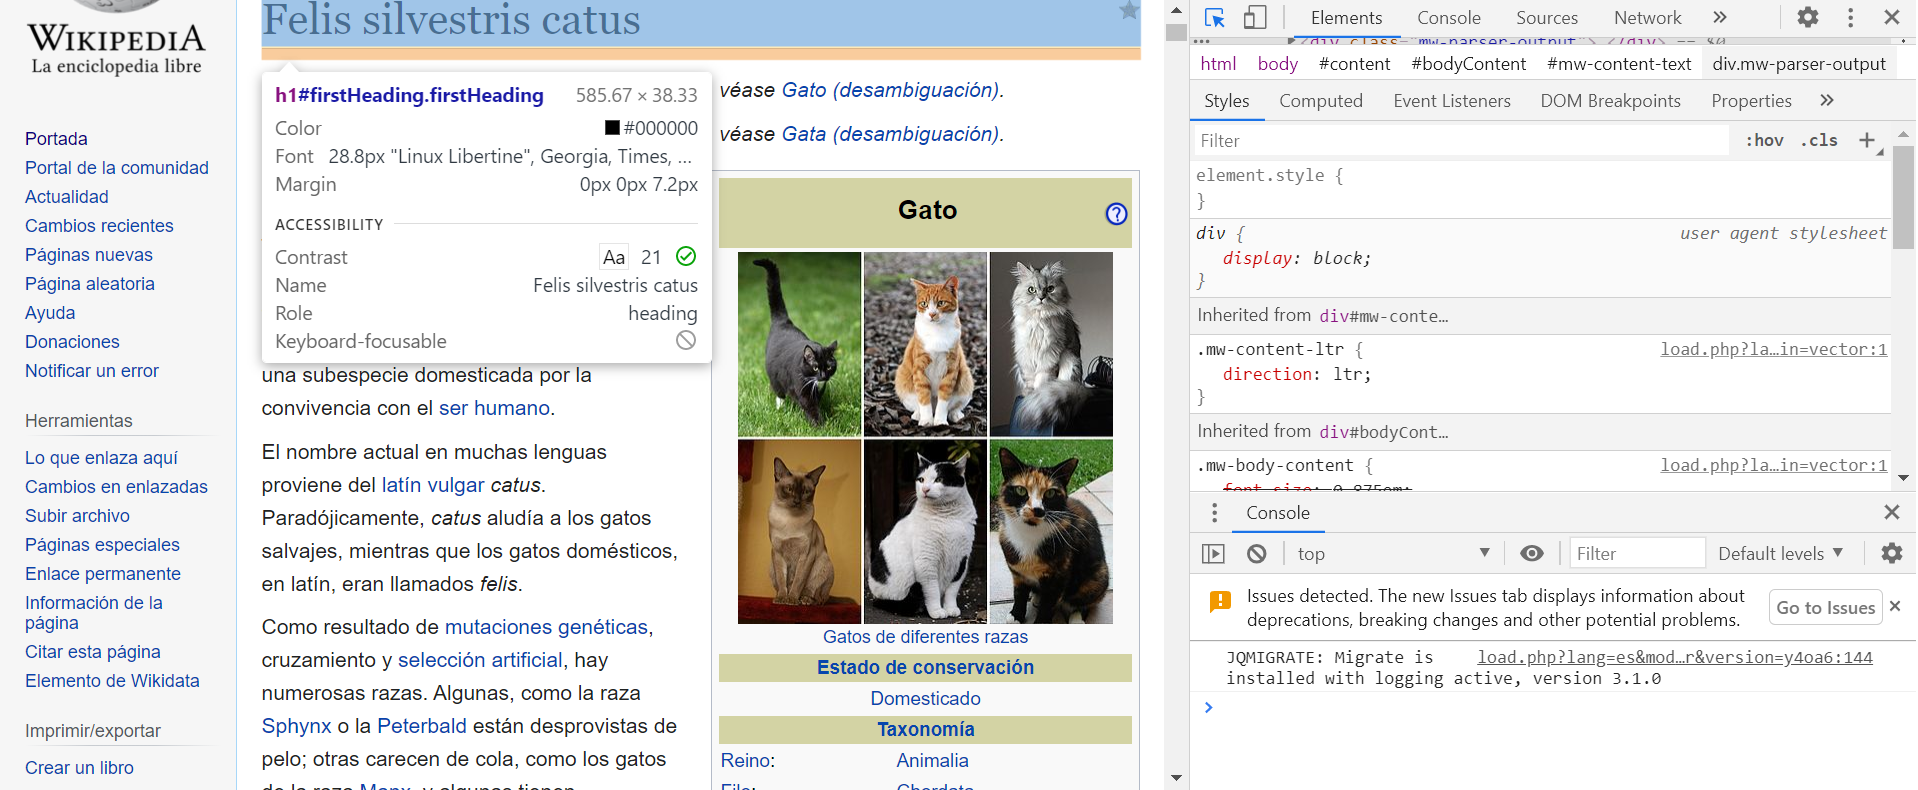


---








Para empezar a trabajar esta parte, vamos a ver cómo scrapear contenido de la Wikipedia, concretamente, vamos a obtener la lista de las festividades más relevantes de España, los enlaces donde podemos encontrar mayor información y una breve descripción de las mismas.


In [ ]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup

In [ ]:
# Definir la url de la web que se desee scrapear
url_base = "https://es.wikipedia.org/wiki/Turismo_en_Espa%C3%B1a"

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

200

In [ ]:
# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object.
soup = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('Wiki_respuesta.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

En el explorador de archivos del Collaboratory (desplegar el menú de la izquierda) o en local donde se haya guardado el notebook, abrimos el fichero generado _Wiki_respuesta.html_ para revisar la estructura de la página web.

Este ejercicio, junto con la el inspector de paginas web disponible en el navegador, nos permitirá localizar dónde se encuentra la información que nos interesa (Festivos de España).


Si nos fijamos, podemos ver que la información de interés está contenida en los enlaces (\<a\>) del último párrafo (\<p\>).

In [ ]:
#Obtener todos los links del último párrafo
links = soup.find_all('p')[-1].find_all('a')
links

[<a class="mw-redirect" href="/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)" title="Fiestas de Interés Turístico Internacional (España)">Fiestas de Interés Turístico Internacional</a>,
 <a href="/wiki/Feria_de_Abril" title="Feria de Abril">Feria de Abril de Sevilla</a>,
 <a href="/wiki/Hogueras_de_Alicante" title="Hogueras de Alicante">Hogueras de Alicante</a>,
 <a href="/wiki/Feria_de_Albacete" title="Feria de Albacete">Feria de Albacete</a>,
 <a href="/wiki/Carnaval_de_Santa_Cruz_de_Tenerife" title="Carnaval de Santa Cruz de Tenerife">Carnaval de Santa Cruz de Tenerife</a>,
 <a href="/wiki/Sanfermines" title="Sanfermines">Sanfermines de Pamplona</a>,
 <a href="/wiki/Fiestas_del_Pilar" title="Fiestas del Pilar">Fiestas del Pilar de Zaragoza</a>,
 <a class="mw-redirect" href="/wiki/Semana_Santa_de_Sevilla" title="Semana Santa de Sevilla">Semana Santa de Sevilla</a>]

La url que aparece asociada a cada festividad es una url relativa. Por tanto, para obtener la dirección url completa podemos utilizar la función _urljoin_.

In [ ]:
from urllib.parse import urljoin

# Extraer el nombre de la festividad (asociado con el atribut 'title' del elemento 'a')
nombre_links=[l.get('title') for l in links]

# Extraer el valor de la url relativa (asociada con el atribut 'href' del elemento 'a')
url_rel_links=[l.get('href') for l in links]

#Transformar los links relativos a absolutos
url_complet_links = [urljoin(url_base, url) for url in url_rel_links]

In [ ]:
# Extraer solo las url que apuntan a Wikipedia (url internas)
links_int = [url for url in url_complet_links if 'wikipedia.org' in url]
links_int

['https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)',
 'https://es.wikipedia.org/wiki/Feria_de_Abril',
 'https://es.wikipedia.org/wiki/Hogueras_de_Alicante',
 'https://es.wikipedia.org/wiki/Feria_de_Albacete',
 'https://es.wikipedia.org/wiki/Carnaval_de_Santa_Cruz_de_Tenerife',
 'https://es.wikipedia.org/wiki/Sanfermines',
 'https://es.wikipedia.org/wiki/Fiestas_del_Pilar',
 'https://es.wikipedia.org/wiki/Semana_Santa_de_Sevilla']

In [ ]:
nombre_links

['Fiestas de Interés Turístico Internacional (España)',
 'Feria de Abril',
 'Hogueras de Alicante',
 'Feria de Albacete',
 'Carnaval de Santa Cruz de Tenerife',
 'Sanfermines',
 'Fiestas del Pilar',
 'Semana Santa de Sevilla']

Para poder obtener la breve descripción de cada una de las festividades asociadas a los links anteriores, vamos a scrapear el contenido de dichas urls y obtener la información contenida en el primer párrafo (asumimos que en él es dónde se hace la introducción del concepto). Para ello, construiremos un bucle que en cada iteración obtenga datos de cada url. Antes de cada solicitud al servidor esperaremos un segundo para controlar el tiempo y asegurarnos de que se puedan ejecutar correctamente las solicitudes.  

In [ ]:
# Cargar la librería time
import time

In [ ]:
# inicializar la lista donde se van a guardar los parrafos con la breve descripción
par_text = []

# Bucle para scrapear cada link
i = 0
for url in links_int:

    # wait for 1 second before each request
    time.sleep(1)

    # connect to every webpage
    p_resp = requests.get(url)

    # checking if the request is successful
    if p_resp.status_code == 200:            # OK!
        print('URL #{0}: {1}'.format(i+1,url))    # imprimir el numero de iteración junto con la url

    else:
        print('Status code {0}: Skipping URL #{1}: {2}'.format(p_resp.status_code, i+1, url)) #Imprimir el error
        i = i+1
        continue


    # obtener HTML
    p_html = p_resp.content

    # convertir HTML a objeto BeautifulSoup
    p_soup = BeautifulSoup(p_html, 'lxml')

    # obtener texto relativo al primer párrafo
    p_pars = p_soup.find("p").text

    # Añadir el párrafo a la lista de párrafos
    par_text.append(p_pars)

    # Incrementing the loop counter
    i = i+1

URL #1: https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)
URL #2: https://es.wikipedia.org/wiki/Feria_de_Abril
URL #3: https://es.wikipedia.org/wiki/Hogueras_de_Alicante
URL #4: https://es.wikipedia.org/wiki/Feria_de_Albacete
URL #5: https://es.wikipedia.org/wiki/Carnaval_de_Santa_Cruz_de_Tenerife
URL #6: https://es.wikipedia.org/wiki/Sanfermines
URL #7: https://es.wikipedia.org/wiki/Fiestas_del_Pilar
URL #8: https://es.wikipedia.org/wiki/Semana_Santa_de_Sevilla


In [ ]:
url_and_info = dict(zip(links_int, par_text))
url_and_info

{'https://es.wikipedia.org/wiki/Fiestas_de_Inter%C3%A9s_Tur%C3%ADstico_Internacional_(Espa%C3%B1a)': 'La declaración de Fiesta de Interés Turístico Internacional es una distinción de carácter honorífico que se concede en España por la Secretaría General de Turismo del Ministerio de Industria, Turismo y Comercio a las fiestas o acontecimientos que supongan manifestaciones de valores culturales y de tradición popular, con especial consideración a sus características etnológicas y que tengan una especial importancia como atractivo turístico.\n',
 'https://es.wikipedia.org/wiki/Feria_de_Abril': 'La Feria de Abril o Feria de Sevilla es una fiesta de primavera que se celebra anualmente en la ciudad de Sevilla (Comunidad autónoma de Andalucía, España), donde el público se reúne en un gran recinto denominado Real de la Feria, con calles engalanadas con farolillos y con casetas efímeras, por las que durante el día circulan jinetes y coches de caballo y por las que pasan diariamente aproximadame

#### **Práctico 3** (Rotten Tomatoes & IMDb)

Tener una suscripción a una plataforma y no saber que ver es un problema común. Existen diferentes páginas web que ofrecen información muy detallada y continuamente actualizada por usuarios sobre contenido audiovisual que ayuda a escoger cuál va a ser la siguiente película a ver.

Entre toda la multitud de información que se puede consultar, en este partado nos vamos a centrar en conocer las mejores películas del 2024 según Rotten Tomatoes así como las mejores películas según IMDb para el mismo año. Posteriormente cruzaremos la información para ver si hay datos comunes.

- Rotten Tomatoes: https://editorial.rottentomatoes.com/guide/best-2024-movies-every-certified-fresh/
- IMDb: https://www.imdb.com/list/ls522499081/?sort=user_rating%2Cdesc/

Realizaremos:

1. Obtener un DataFrame de las películas de Rotten Tomatoes. Tened en cuenta que las películas pueden estar situadas en más de una página de navegación. De la página 1 coger hasta la película 100 y de la página 2 de la 101 en adelante. Mostrar el Dataframe.
2. Obtener un DataFrame de las películas de IMDb. Mostrar el Dataframe.
3. Con ambos DataFrames, cruzarlos por el título y mostrar qué películas hay en común.

Las características para el DataFrame de Rotten Tomatoes:
- Título
- Año
- Puntuación
- Director
- Crítica
- Sinopsis
- Ranking

Las características para el DataFrame de IMDb:
- Título
- Duración
- Año
- Puntuación
- url completa de la película (url_base + url_relativa)
- Número de votaciones



Cargar librerías

In [ ]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd

1

In [ ]:
# Definir la url de la web que se desee scrapear
url_base1_page1 = "https://editorial.rottentomatoes.com/guide/best-2024-movies-every-certified-fresh/"
url_base1_page2 = "https://editorial.rottentomatoes.com/guide/best-2024-movies-every-certified-fresh/2/"

# Hacer la solicitud
respuesta_page1 = requests.get(url_base1_page1)
respuesta_page2 = requests.get(url_base1_page2)

respuesta_page1.status_code
respuesta_page2.status_code

200

In [ ]:
# Extraer el HTML
html = respuesta_page1.content

# Convertir HTML a BeautifulSoup object.
soup = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('Rotten_respuesta_page1.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

In [ ]:
# Definir funcion para obter la informacion de ambas URL
def extract_movies(url, max_rank):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    movies = []

    items = soup.find_all("div", class_="row countdown-item")
    for item in items:
        # Extraer el ranking de la película
        rank = int(item.find("div", class_="countdown-index").text.strip("#"))
        # Si el ranking excede el máximo permitido, detener la iteración
        if rank > max_rank:
            break

        # Acceder a la sección <h2> directamente
        title_section = item.find("h2")  # Enfocar directamente en <h2>

        # Extraer el título desde el <a> dentro de <h2>
        title = title_section.find("a").text.strip()

        # Extraer el año desde <span> dentro de <h2>
        year = title_section.find("span", class_="subtle start-year").text.strip("()")

        # Extraer la puntuación desde <span> dentro de <h2>
        score = title_section.find("span", class_="tMeterScore").text.strip()

        # Extraer otros datos
        director = item.find("div", class_="info director").text.strip().replace("Directed By:", "").strip()
        consensus = item.find("div", class_="critics-consensus").text.strip().replace("Critics Consensus:", "").strip()
        synopsis = item.find("div", class_="info synopsis").text.strip().replace("Synopsis:", "").strip()
        rank = item.find("div", class_="countdown-index").text.strip("#")

        movies.append({
            "Título": title,
            "Año": year,
            "Puntuación": score,
            "Director": director,
            "Crítica": consensus,
            "Sinopsis": synopsis,
            "Ranking": rank
        })
    return movies

In [ ]:
# Extrae los datos de ambas paginas y combina resultados
movies_page1 = extract_movies(url_base1_page1, 100)
movies_page2 = extract_movies(url_base1_page2, 213)
all_movies = movies_page1 + movies_page2

In [ ]:
# Creamos el DataFrame
df_movies = pd.DataFrame(all_movies)
print(df_movies)

                                    Título   Año Puntuación  \
0                  All We Imagine as Light  2024       100%   
1    Wallace & Gromit: Vengeance Most Fowl  2024       100%   
2                          Nowhere Special  2020       100%   
3                      Girls Will Be Girls  2024       100%   
4                On Becoming a Guinea Fowl  2024       100%   
..                                     ...   ...        ...   
208                                  Drift  2023        74%   
209                           Emilia Pérez  2024        72%   
210                          Self Reliance  2023        73%   
211                               MaXXXine  2024        72%   
212                           Gladiator II  2024        71%   

                                    Director  \
0                              Payal Kapadia   
1    Merlin Crossingham\n\t\t, \t\tNick Park   
2                            Uberto Pasolini   
3                              Shuchi Talati   
4  

 2

In [ ]:
url_base_imdb = "https://www.imdb.com/list/ls522499081/?sort=user_rating%2Cdesc/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
# Hacer la solicitud
respuesta_imdb = requests.get(url_base_imdb, headers=headers)

respuesta_imdb.status_code

200

In [ ]:
# Extraer el HTML
html = respuesta_imdb.content

# Convertir HTML a BeautifulSoup object.
soup2 = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('IMDb.html', 'wb') as file:
    file.write(soup2.prettify('utf-8'))

In [ ]:
# Lista para almacenar las películas
movies = []

# Buscar las películas dentro del HTML
items = soup2.find_all("div", class_="sc-e8bccfea-0")  # Ajusta según la estructura
for item in items:
    try:
        # Extraer título
        title_section = item.find("h3", class_="ipc-title__text")
        raw_title = title_section.text.strip()
        title = raw_title.split(". ", 1)[-1] # Eliminamos la numeracion del incio del titulo

        # Extraer año yduración
        metadata = item.find_all("span", class_="dli-title-metadata-item")
        year = metadata[0].text.strip()
        duration = metadata[1].text.strip()

        # Extraer puntuación y número de votaciones
        rating_section = item.find("span", class_="ipc-rating-star--rating")
        score = rating_section.text.strip()

        votes_section = item.find("span", class_="ipc-rating-star--voteCount")
        votes = votes_section.text.replace("(", "").replace(")", "").strip()

        # Construir la URL completa
        relative_url = item.find("a", class_="ipc-title-link-wrapper")["href"]
        full_url = f"https://www.imdb.com/es-es{relative_url}"

        # Añadir los datos a la lista
        movies.append({
            "Título": title,
            "Duración": duration,
            "Año": year,
            "Puntuación": score,
            "URL Completa": full_url,
            "Número de Votaciones": votes
        })
    except Exception as e:
        # Ignorar películas que no tengan todos los datos
        print(f"Error al procesar una película: {e}")
        continue

# Crear el DataFrame
df_movies_imdb = pd.DataFrame(movies)

# Mostrar el DataFrame
print(df_movies_imdb)

                                            Título Duración   Año Puntuación  \
0                                     Emilia Pérez   2h 12m  2024        5.4   
1                                         Babygirl   1h 54m  2024        6.0   
2                                            Blitz       2h  2024        6.2   
3   The Lord of the Rings: The War of the Rohirrim   2h 14m  2024        6.3   
4                                    The Beekeeper   1h 45m  2024        6.3   
5                                      Terrifier 3    2h 5m  2024        6.3   
6                                             MadS   1h 29m  2024        6.4   
7                                Kinds of Kindness   2h 44m  2024        6.5   
8                            Bad Boys: Ride or Die   1h 55m  2024        6.5   
9                                          Uzumaki    4 eps  2024        6.5   
10                                        Longlegs   1h 41m  2024        6.6   
11                           Mufasa: The

3

In [ ]:
# Cruzar los DataFrames por el Título
common_movies = pd.merge(df_movies, df_movies_imdb, on="Título")

# Mostrar el resultado
print(f"Películas en común: {len(common_movies)}")
print(common_movies)

Películas en común: 17
                  Título Año_x Puntuación_x  \
0            Rebel Ridge  2024          96%   
1                Hit Man  2023          95%   
2     Love Lies Bleeding  2024          94%   
3                   MadS  2024          93%   
4               Juror #2  2024          93%   
5                Heretic  2024          91%   
6            Challengers  2024          88%   
7               Longlegs  2024          86%   
8                Smile 2  2024          86%   
9   Sonic the Hedgehog 3  2024          85%   
10                  Bird  2024          86%   
11                 Blitz  2024          81%   
12        The Bikeriders  2023          80%   
13    It's What's Inside  2024          79%   
14           Terrifier 3  2024          78%   
15              Babygirl  2024          76%   
16          Emilia Pérez  2024          72%   

                             Director  \
0                     Jeremy Saulnier   
1                   Richard Linklater   
2      

## 3. WEB SCRAPING CON SERPAPI

En esta parte vamos a realizar web scraping utilizando SerpApi. Esta API permite escrapear el contenido que es el resultado de diferentes motores de búsqueda como Google, Yahoo, Youtube,...

SerpApi permite el uso gratuito siempre que no excedas las 100 consultas mensuales, asimismo, siempre está la opción desarrollador que incluye la modalidad de pago. Utilizaremos las funcionalidades gratuitas de esta API.
Para poder utilizar SerpApi, y por tanto continuar con la realización de la PEC, se deben seguir estos pasos:

1. Crear una cuenta en SerpApi para conseguir la clave secreta (API_SECRET__KEY) para poder realizar las diferentes solicitudes web. Para ello debes acceder a esta web: https://serpapi.com. Después de registrarte (es muy sencillo), deberás ir al correo con el que te has registrado para confirmar el correo y ya estarás preparado para utilizar la API.
2. Instalar el módulo google-search-results para poder acceder a SerpAPI.
3. Configurar los parámetros de búsqueda, como el ejemplo situado más abajo.
4. Pasar los parámetros de búsqueda a la función GoogleSearchResults(searchParams) para obtener los resultados.
5. Completar el código para realizar la request y obtener los datos deseados.
6. Seleccionar el contenido de los resultados que es de interés.

En el siguiente código se puede observar el ejemplo de las instrucciones indicadas:



```
# Instalar modulo google-search-results
!pip install google-search-results

# Cargar librería
from serpapi import GoogleSearch

# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()
```

Documentación de SerpAPI (https://serpapi.com/search-api)


In [ ]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=94da4d08d9f027ec1987a8247b8626cac69712e9c9fe82973ca5647661e1fded
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


In [ ]:
API_GOOGLE = "XXXXXXXX"

In [ ]:
# Cargar librería
from serpapi import GoogleSearch

# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()

In [ ]:
# Mostramos resultados
results

{'search_metadata': {'id': '67bb2e760b682f1a1daf33cc',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/291582e7865936fd/67bb2e760b682f1a1daf33cc.json',
  'created_at': '2025-02-23 14:19:34 UTC',
  'processed_at': '2025-02-23 14:19:34 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=Cambio+climatico',
  'raw_html_file': 'https://serpapi.com/searches/291582e7865936fd/67bb2e760b682f1a1daf33cc.html',
  'total_time_taken': 1.71},
 'search_parameters': {'engine': 'youtube',
  'search_query': 'Cambio climatico'},
 'search_information': {'total_results': 13623883,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': '¿Qué es el Cambio Climático? | Nat Geo',
   'link': 'https://www.youtube.com/watch?v=ZqiSiX8QD7o',
   'serpapi_link': 'https://serpapi.com/search.json?engine=youtube_video&v=ZqiSiX8QD7o',
   'channel': {'name': 'National Geographic Latinoamérica',
    'link': 'https://www.youtube.

### Práctico 4 (SerpAPI)

En este apartado, haciendo uso de SerpApi, se resolveran a las siguientes cuestiones:

**1. Ofertas trabajo Científico de Datos** (Engine: google_jobs): Como estudiantes del grado de Ciencia de Datos Aplicada estamos interesados en saber las distintas ofertas que hay para perfiles de ciéntifico de datos y el tipo de empleo ofertado. Para ello:

1. Buscar con el motor de empleos (engine google_jobs) y dominio español (google.es) los resultados de las 5 primeras páginas (si existen menos limitarlo al número máximo de página) buscando con la query "Cientifico de datos en España"
    
2. Construir un DataFrame con los resultados anteriores tomando como columnas las variables "title", "company_name", "location" y "schedule_type". Dejar como N/A en caso de absencia de valor. Mostrar el DataFrame. ¿Cuántas ofertas tenemos en el DataFrame?
    
3. ¿Cuál es la principal fuente de publicación de las ofertas?.
    
4. ¿Qué porcentaje de las ofertas son a tiempo completo?.

> documentacion de la API para job: https://serpapi.com/google-jobs-api

Carga librerías

In [ ]:
# Cargar librería
from serpapi import GoogleSearch
import pandas as pd

 1.1

In [ ]:
API_GOOGLE = "a6db8fad647948e4ded8f93af53c0a2690fcd7eccc0283f102bb05835854bfb0"
search_query = "Cientifico de datos en España"

# Lista para almacenar los resultados
jobs = []
next_page_token = None
max_page = 5 # Iteramos como másimo en 5 páginas

# Iterar por las primeras 5 páginas
for page in range(max_page):
    searchParams = {
        "api_key": API_GOOGLE,
        "engine": "google_jobs",
        "q": search_query,
        "hl": "es",  # Idioma español
        "gl": "es",  # Ubicación España
    }

    # Añadir el token de paginación si existe
    if next_page_token:
        searchParams["next_page_token"] = next_page_token

    # Realizar la búsqueda
    search = GoogleSearch(searchParams)
    results = search.get_dict()

    # Extraer las ofertas; la estructura suele estar en "jobs_results"
    page_jobs = results.get("jobs_results", [])
    jobs.extend(page_jobs)

    # Actualizar el token para la siguiente página
    next_page_token = results.get("next_page_token")
    if not next_page_token:
      break  # Si ya no hay más resultados, se sale del ciclo

jobs

[{'title': 'Personal Experto en Inteligencia Artificial y Ciencia de Datos',
  'company_name': 'Banco de España',
  'location': 'Madrid',
  'via': 'Banco De España',
  'share_link': 'https://www.google.com/search?ibp=htl;jobs&q=Cientifico+de+datos+en+Espa%C3%B1a&htidocid=jsw1y1uho-J7eam2AAAAAA%3D%3D&hl=es-ES&shndl=37&shmd=H4sIAAAAAAAA_yXMMQrCQBCFYWxzhFRbW2RFsImV0SAWgheQMNmMcWWzs-6MEI9lJ7a5mCY2j8dffMl7lpxPGJk8OFX2AaOQQq8OXtDZFr2xoDZR7MX-nlNPtbX_2KDagRDnqhg-fH9gMzXsgsOJ2BO1DtP1VSRwrjWzy1oWEGsyQ50mjzX1-kY1j1PxFSIGB4LVcrXos-DbeVqANzS6JQcYXjDCR2iibb6x5uxHuwAAAA&shmds=v1_AQbUm94cl27-OSdjllHNKTl0kf9A8NvxH-FIwS1QJfVzYTBzZA&source=sh/x/job/li/m1/1#fpstate=tldetail&htivrt=jobs&htiq=Cientifico+de+datos+en+Espa%C3%B1a&htidocid=jsw1y1uho-J7eam2AAAAAA%3D%3D',
  'extensions': ['hace 4 días', 'A tiempo completo'],
  'detected_extensions': {'posted_at': 'hace 4 días',
   'schedule_type': 'A tiempo completo'},
  'description': 'Personal Experto en Inteligencia Artificial y Ciencia de Datos (Anuncio 2025

1.2

In [ ]:
# creamos una lista para almacenar la informacion para el df
# recorremos las lista creada en el anterior paso que contiene la informacion que necesitamos
jobs_data = []
for job in jobs:
    job_entry = {
        "title": job.get("title", "N/A"),
        "company_name": job.get("company_name", "N/A"),
        "location": job.get("location", "N/A"),
        "schedule_type": job.get("detected_extensions", {}). get("schedule_type", "N/A")
    }
    jobs_data.append(job_entry)

df = pd.DataFrame(jobs_data)

# Se muestra el DataFrame y se indica el número total de ofertas
print(df)
print("Total de ofertas:", len(df))


                                               title      company_name  \
0  Personal Experto en Inteligencia Artificial y ...   Banco de España   
1                 ? Busqueda Urgente: Data Scientist          Quantrue   
2                    Científico De Datos (Big Data).       Jobtome-All   
3                                Científico de datos          Tinámica   
4                Data Scientist en Entorno Streaming             Ineco   
5              Científico de Datos (Área Innovacion)              LLYC   
6                                 AI Data Scientists    Serviguide BPO   
7                    Data Scientist SR (full remote)           Lognext   
8        Científico de Datos (Data Scientist) Senior            Nunsys   
9                              Científico/A De Datos  buscojobs España   

              location      schedule_type  
0               Madrid  A tiempo completo  
1               Madrid  A tiempo completo  
2               Madrid  A tiempo completo  
3        

1.3

In [ ]:
# Recorremos "jobs" la lista obtenida de SerpApi
jobs_data = []
for job in jobs:
    job_entry = {
        "title": job.get("title", "N/A"),
        "company_name": job.get("company_name", "N/A"),
        "location": job.get("location", "N/A"),
        "schedule_type": job.get("detected_extensions", {}).get("schedule_type", "N/A"),
        "via": job.get("via", "N/A")  # Extraemos la fuente de publicación
    }
    jobs_data.append(job_entry)

# Creamos el DataFrame
df = pd.DataFrame(jobs_data)


# Contabilizamos las ocurrencias de cada fuente de publicación
source_counts = df["via"].value_counts()
print("Resumen de fuentes de publicación:")
print(source_counts)

# La principal fuente es aquella que aparece más veces
if not source_counts.empty:
    main_source = source_counts.idxmax()
    print("\nLa principal fuente de publicación de las ofertas es:", main_source)
else:
    print("No se encontró información sobre la fuente de publicación.")

Resumen de fuentes de publicación:
via
WhatJobs           4
LinkedIn           2
Banco De España    1
Ticjob             1
Jooble             1
Indeed             1
Name: count, dtype: int64

La principal fuente de publicación de las ofertas es: WhatJobs


1.4

In [ ]:
# Total de ofertas obtenidas:
total_offers = len(df)

# Ofertas a tiempo completo:
full_time_offers = df[df["schedule_type"] == "A tiempo completo"]
num_full_time = len(full_time_offers)

# Calcular el porcentaje:
if total_offers > 0:
    full_time_percentage = (num_full_time / total_offers) * 100
    print(f"El {full_time_percentage:.2f}% de las ofertas son a tiempo completo.")
else:
    print("No hay ofertas para analizar.")


El 100.00% de las ofertas son a tiempo completo.


**2. Panorama musical** (Youtube): Queremos ponernos al día con las canciones y los artistas del momento, por esto se pide:

1. Hacer web scrapping (el método preferido para el estudiante) para obtener la lista de los 40 principales con las principales canciones del momento: https://los40.com/lista40/. El resultado debe ser un DataFrame con el nombre de la canción, los cantantes y su posición en la lista. Mostrar el DataFrame.

2. Reducir el DataFrame a los 20 primeros en la clasificación y mostrar el DataFrame resumido. Pasar cada nombre de la canción + artistas por el parámetro "search_query" y realizar una consulta en YouTube (engine = Youtube) para conseguir información sobre el video (video_results) que se encuentre en primera posición en la búsqueda (position_on_page=1). La información que extraeremos de youtube sobre video es el título, la duración, números de visitas y link. Este paso debería hacerse dentro de un **loop**.

3. Del listado que se haya obtenido del punto anterior, insertar en el notebook el video con más visualizaciones.

Carga librerías

In [ ]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd

2.1

In [ ]:
# Definir la url de la web que se desee scrapear
url_base_los40 = "https://los40.com/lista40/"

# Hacer la solicitud
respuesta_los40 = requests.get(url_base_los40)

respuesta_los40.status_code


200

In [ ]:
# Extraer el HTML
html = respuesta_los40.content

# Convertir HTML a BeautifulSoup object.
soup3 = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('los40.html', 'wb') as file:
    file.write(soup3.prettify('utf-8'))

In [ ]:
# Encontrar el contendedor principal de las canciones
lista_canciones = soup3.find("ul", class_="lst-can")
song_items = lista_canciones.find_all("li")
# Lista para almacenar las canciones
songs = []

for item in song_items:
  try:
    # Extraer la poscion
    posicion = item.find("div", class_="pos").find("p").get_text(strip=True)

    # Extraemos el titulo y artista
    titulo = item.find("h2").get_text(strip=True)
    artista = item.find("h2").find_next("span").get_text(strip=True)

    songs.append({
        "Canción": titulo,
        "Artista": artista,
        "Posición": posicion,
    })
  except Exception as e:
      print(f"Error procesando un elemento: {e}")

# Creamos el DataFrame con la informacion obtenida
df_songs = pd.DataFrame(songs)
print(df_songs)


Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute 'find'
Error procesando un elemento: 'NoneType' object has no attribute

2.2

In [ ]:
# Cargar librería
from serpapi import GoogleSearch
import pandas as pd
import json

In [ ]:
# Filtrar el DataFrame a los 20 primeros
df_top20 = df_songs.head(20)
print("\nDataFrame de los 20 primeros:")
print(df_top20)

# API key y configuración para SerpApi
API_KEY = "a6db8fad647948e4ded8f93af53c0a2690fcd7eccc0283f102bb05835854bfb0"

# Lista para almacenar la información obtenida de YouTube
youtube_data = []

# Iterar sobre cada fila de los 20 primeros
for index, row in df_top20.iterrows():
    # Construir el término de búsqueda combinando canción y artista
    search_query = f"{row['Canción']} {row['Artista']}"
    print(f"\nBuscando en YouTube: {search_query}")

    # Configurar los parámetros para la consulta a SerpApi
    params = {
        "api_key": API_KEY,
        "engine": "youtube",
        "search_query": search_query,
        "hl": "es",  # Idioma español
        "gl": "es"   # Ubicación: España
    }

    try:
        search = GoogleSearch(params)
        results = search.get_dict()

        # Extraer la lista de resultados de video
        video_results = results.get("video_results", [])

        if video_results and len(video_results) > 0:
            # Seleccionar el primer resultado (position_on_page=1)
            video_info = video_results[0]

            video_title = video_info.get("title", "")
            video_duration = video_info.get("length", "")
            video_views = video_info.get("views", "")
            video_link = video_info.get("link", "")

            youtube_data.append({
                "Título Video": video_title,
                "Duración": video_duration,
                "Visitas": video_views,
                "Link": video_link
            })
        else:
            print(f"No se encontraron resultados para: {search_query}")

    except Exception as e:
        print(f"Error al consultar YouTube para '{search_query}': {e}")


# Crear un DataFrame con la información obtenida de YouTube
df_youtube = pd.DataFrame(youtube_data)
print("\nDataFrame final con información de YouTube:")
print(df_youtube)



DataFrame de los 20 primeros:
                            Canción  \
0                       Te confieso   
1                              APT.   
2                  Cosas pendientes   
3                             Messy   
4                    That's so true   
5               Capaz (Merenguetón)   
6                          Gran Vía   
7            We pray (Tini version)   
8                           Mi refe   
9                  Die with a smile   
10                        Qué pecao   
11         Born with a broken heart   
12                  Segundo intento   
13                  Belong together   
14                         El cielo   
15  Sorry I'm here for someone else   
16                         Degenere   
17                       Stargazing   
18                             Pá K   
19                         Ordinary   

                                             Artista Posición  
0                                              DePol        1  
1                    

2.3

Video con más vistas: ROSÉ & Bruno Mars - APT. (Official Music Video) (1390588067 vistas)


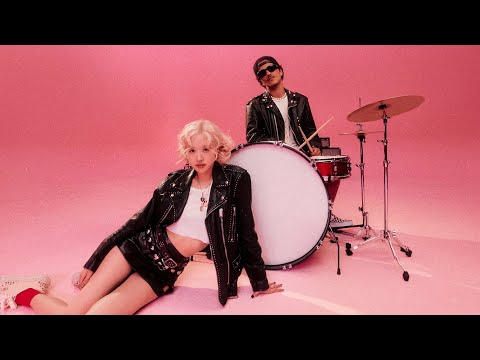

In [ ]:
from IPython.display import display, YouTubeVideo
#(https://stackoverflow.com/questions/51178699/trying-to-display-youtube-video-in-jupyter-notebook)

# Encontrar la fila con el video más visto
max_visitas = df_youtube["Visitas"].max()
video_mas_visto = df_youtube[df_youtube["Visitas"] == max_visitas].iloc[0]  # Obtener la primera coincidencia

# Extraer el ID del video de YouTube
video_id = video_mas_visto["Link"].split("v=")[-1]  # Extraer el ID del link


# Mostrar el video en el notebook
print(f"Video con más vistas: {video_mas_visto['Título Video']} ({video_mas_visto['Visitas']} vistas)")
display(YouTubeVideo(video_id, width=800, height=450))
